In [152]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [153]:
#Load in the data
from sklearn.datasets import load_breast_cancer

In [154]:
#load the data
data = load_breast_cancer()

In [155]:
#check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [156]:
#data keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [157]:
#data shape
data.data.shape

(569, 30)

In [158]:
#data targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [159]:
#data target name
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [160]:
#data targets shape
data.target.shape

(569,)

In [161]:
#data features names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [162]:
#splitting data sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, shuffle=True)
N, D = X_train.shape

In [163]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [164]:
#Build the model

model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [165]:
#Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [166]:
#Convert data to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [167]:
#Train the model
n_epochs = 1000

#Stuff to score
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad()

  #Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  #Backward and optimize
  loss.backward()
  optimizer.step()

  #Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  #Save the losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f"Epoch {it + 1}/{n_epochs}, Train Loss: {loss.item(): .4f}, Test Loss: {loss_test.item(): .4f}")

Epoch 50/1000, Train Loss:  0.3774, Test Loss:  0.3675
Epoch 100/1000, Train Loss:  0.2897, Test Loss:  0.2797
Epoch 150/1000, Train Loss:  0.2389, Test Loss:  0.2282
Epoch 200/1000, Train Loss:  0.2060, Test Loss:  0.1951
Epoch 250/1000, Train Loss:  0.1832, Test Loss:  0.1730
Epoch 300/1000, Train Loss:  0.1666, Test Loss:  0.1574
Epoch 350/1000, Train Loss:  0.1539, Test Loss:  0.1458
Epoch 400/1000, Train Loss:  0.1439, Test Loss:  0.1368
Epoch 450/1000, Train Loss:  0.1358, Test Loss:  0.1296
Epoch 500/1000, Train Loss:  0.1290, Test Loss:  0.1237
Epoch 550/1000, Train Loss:  0.1233, Test Loss:  0.1187
Epoch 600/1000, Train Loss:  0.1184, Test Loss:  0.1145
Epoch 650/1000, Train Loss:  0.1142, Test Loss:  0.1108
Epoch 700/1000, Train Loss:  0.1104, Test Loss:  0.1076
Epoch 750/1000, Train Loss:  0.1071, Test Loss:  0.1048
Epoch 800/1000, Train Loss:  0.1041, Test Loss:  0.1023
Epoch 850/1000, Train Loss:  0.1014, Test Loss:  0.1001
Epoch 900/1000, Train Loss:  0.0990, Test Loss:  

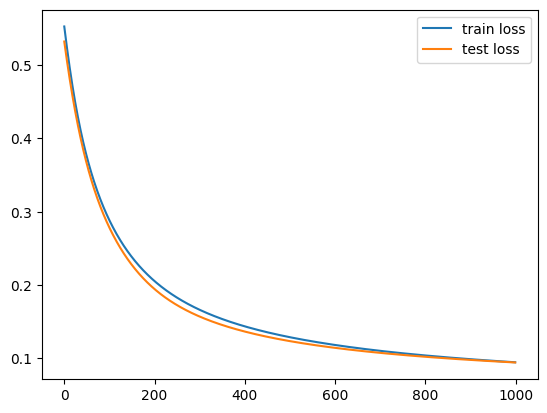

In [168]:
#Plot the graph
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [169]:
#Get the accuracy

with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc: .4f}, Test acc:{test_acc: .4f}")

Train acc:  0.9799, Test acc: 0.9883
